### WNBA TEAM PLAYOFF PREDICTIONS FROM SEASON 1 TO SEASON 10

In today's competitive sports landscape, gaining a competitive edge has become paramount for teams striving for success. The integration of data analytics and machine learning techniques has revolutionized the way sports organizations analyze performance, make strategic decisions, and identify opportunities for improvement. In this report, we delve into the application of machine learning in predicting playoff outcomes in basketball, focusing on the Women's National Basketball Association (WNBA). The objective of this study is to develop a predictive model that accurately forecasts playoff participation for WNBA teams based on a combination of historical performance metrics and team characteristics 

### Data Summary
The dataset includes team specific information such as (Team ID, Franchise ID, Conference ID, the team's name and arena details), players statistics, game results and playoffs involvement through season 1 to 10. Performance measures include field goals made/attempts, free throws made/attempts, three-pointers made/attempts, rebounds, assists, steals, blocks, turnovers, fouls, and points scored, among others offensive and defensive statistics. Furthermore, information on victories, losses, minutes played, and attendance records provides an overview of team chemistry and fan involvement. In-depth information about postseason games played, starts, minutes, points, rebounds, assists, steals, blocks, turnovers, and personal fouls is also included in the dataset

In [1]:
import pandas as pd

In [2]:
teams_df = pd.read_csv("teams.csv")

In [3]:
players_teams_df = pd.read_csv("players_teams.csv")

In [4]:
teams_df.head()

,year,lgID,tmID,franchID,confID,divID,rank,playoff,seeded,firstRound,...,GP,homeW,homeL,awayW,awayL,confW,confL,min,attend,arena
0,9,WNBA,ATL,ATL,EA,NaN,7,N,0,NaN,...,34,1,16,3,14,2,18,6825,141379,Philips Arena
1,10,WNBA,ATL,ATL,EA,NaN,2,Y,0,L,...,34,12,5,6,11,10,12,6950,120737,Philips Arena
2,1,WNBA,CHA,CHA,EA,NaN,8,N,0,NaN,...,32,5,11,3,13,5,16,6475,90963,Charlotte Coliseum
3,2,WNBA,CHA,CHA,EA,NaN,4,Y,0,W,...,32,11,5,7,9,15,6,6500,105525,Charlotte Coliseum
4,3,WNBA,CHA,CHA,EA,NaN,2,Y,0,L,...,32,11,5,7,9,12,9,6450,106670,Charlotte Coliseum


In [5]:
# List of columns to drop
columns_to_drop = ['divID', 'firstRound', 'semis', 'finals', 'seeded', 'lgID']

# Drop the specified columns from the team dataframe
teams_df = teams_df.drop(columns=columns_to_drop)
teams_df.describe()
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 55 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      142 non-null    int64 
 1   tmID      142 non-null    object
 2   franchID  142 non-null    object
 3   confID    142 non-null    object
 4   rank      142 non-null    int64 
 5   playoff   142 non-null    object
 6   name      142 non-null    object
 7   o_fgm     142 non-null    int64 
 8   o_fga     142 non-null    int64 
 9   o_ftm     142 non-null    int64 
 10  o_fta     142 non-null    int64 
 11  o_3pm     142 non-null    int64 
 12  o_3pa     142 non-null    int64 
 13  o_oreb    142 non-null    int64 
 14  o_dreb    142 non-null    int64 
 15  o_reb     142 non-null    int64 
 16  o_asts    142 non-null    int64 
 17  o_pf      142 non-null    int64 
 18  o_stl     142 non-null    int64 
 19  o_to      142 non-null    int64 
 20  o_blk     142 non-null    int64 
 21  o_pts     142 no

In [6]:
players_teams_df.head()

,playerID,year,stint,tmID,lgID,GP,GS,minutes,points,oRebounds,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,abrossv01w,2,0,MIN,WNBA,26,23,846,343,43,...,0,0,0,0,0,0,0,0,0,0
1,abrossv01w,3,0,MIN,WNBA,27,27,805,314,45,...,0,0,0,0,0,0,0,0,0,0
2,abrossv01w,4,0,MIN,WNBA,30,25,792,318,44,...,1,8,8,22,6,8,8,7,3,0
3,abrossv01w,5,0,MIN,WNBA,22,11,462,146,17,...,2,3,7,23,8,4,2,8,2,0
4,abrossv01w,6,0,MIN,WNBA,31,31,777,304,29,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# List of columns to drop
columns_to_drop = ['lgID']

# Drop the specified columns from the team dataframe
players_teams_df = players_teams_df.drop(columns=columns_to_drop)
players_teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 42 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   playerID            1876 non-null   object
 1   year                1876 non-null   int64 
 2   stint               1876 non-null   int64 
 3   tmID                1876 non-null   object
 4   GP                  1876 non-null   int64 
 5   GS                  1876 non-null   int64 
 6   minutes             1876 non-null   int64 
 7   points              1876 non-null   int64 
 8   oRebounds           1876 non-null   int64 
 9   dRebounds           1876 non-null   int64 
 10  rebounds            1876 non-null   int64 
 11  assists             1876 non-null   int64 
 12  steals              1876 non-null   int64 
 13  blocks              1876 non-null   int64 
 14  turnovers           1876 non-null   int64 
 15  PF                  1876 non-null   int64 
 16  fgAttempted         1876

In [8]:
# Merge the dataframes on both 'year' and 'tmID'
combined_df = pd.merge(teams_df, players_teams_df, on=['year', 'tmID'])
combined_df.head()

,year,tmID,franchID,confID,rank,playoff,name,o_fgm,o_fga,o_ftm,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,9,ATL,ATL,EA,7,N,Atlanta Dream,895,2258,542,...,0,0,0,0,0,0,0,0,0,0
1,9,ATL,ATL,EA,7,N,Atlanta Dream,895,2258,542,...,0,0,0,0,0,0,0,0,0,0
2,9,ATL,ATL,EA,7,N,Atlanta Dream,895,2258,542,...,0,0,0,0,0,0,0,0,0,0
3,9,ATL,ATL,EA,7,N,Atlanta Dream,895,2258,542,...,0,0,0,0,0,0,0,0,0,0
4,9,ATL,ATL,EA,7,N,Atlanta Dream,895,2258,542,...,0,0,0,0,0,0,0,0,0,0


In [9]:
combined_df.columns

Index(['year', 'tmID', 'franchID', 'confID', 'rank', 'playoff', 'name',
       'o_fgm', 'o_fga', 'o_ftm', 'o_fta', 'o_3pm', 'o_3pa', 'o_oreb',
       'o_dreb', 'o_reb', 'o_asts', 'o_pf', 'o_stl', 'o_to', 'o_blk', 'o_pts',
       'd_fgm', 'd_fga', 'd_ftm', 'd_fta', 'd_3pm', 'd_3pa', 'd_oreb',
       'd_dreb', 'd_reb', 'd_asts', 'd_pf', 'd_stl', 'd_to', 'd_blk', 'd_pts',
       'tmORB', 'tmDRB', 'tmTRB', 'opptmORB', 'opptmDRB', 'opptmTRB', 'won',
       'lost', 'GP_x', 'homeW', 'homeL', 'awayW', 'awayL', 'confW', 'confL',
       'min', 'attend', 'arena', 'playerID', 'stint', 'GP_y', 'GS', 'minutes',
       'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals',
       'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted',
       'ftMade', 'threeAttempted', 'threeMade', 'dq', 'PostGP', 'PostGS',
       'PostMinutes', 'PostPoints', 'PostoRebounds', 'PostdRebounds',
       'PostRebounds', 'PostAssists', 'PostSteals', 'PostBlocks',
       'PostTurnovers', 'PostPF',

In [10]:
# Sort the combined dataframe based on the 'year' column
combined_df_sorted = combined_df.sort_values(by='year')
# Reset the index of the sorted dataframe
combined_df_sorted = combined_df_sorted.reset_index(drop=True)
#combined_df_sorted.info()

### Exploratory Data Analysis

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

combined_df_sorted.isnull().sum()

year                  0
tmID                  0
franchID              0
confID                0
rank                  0
                     ..
PostftAttempted       0
PostftMade            0
PostthreeAttempted    0
PostthreeMade         0
PostDQ                0
Length: 95, dtype: int64

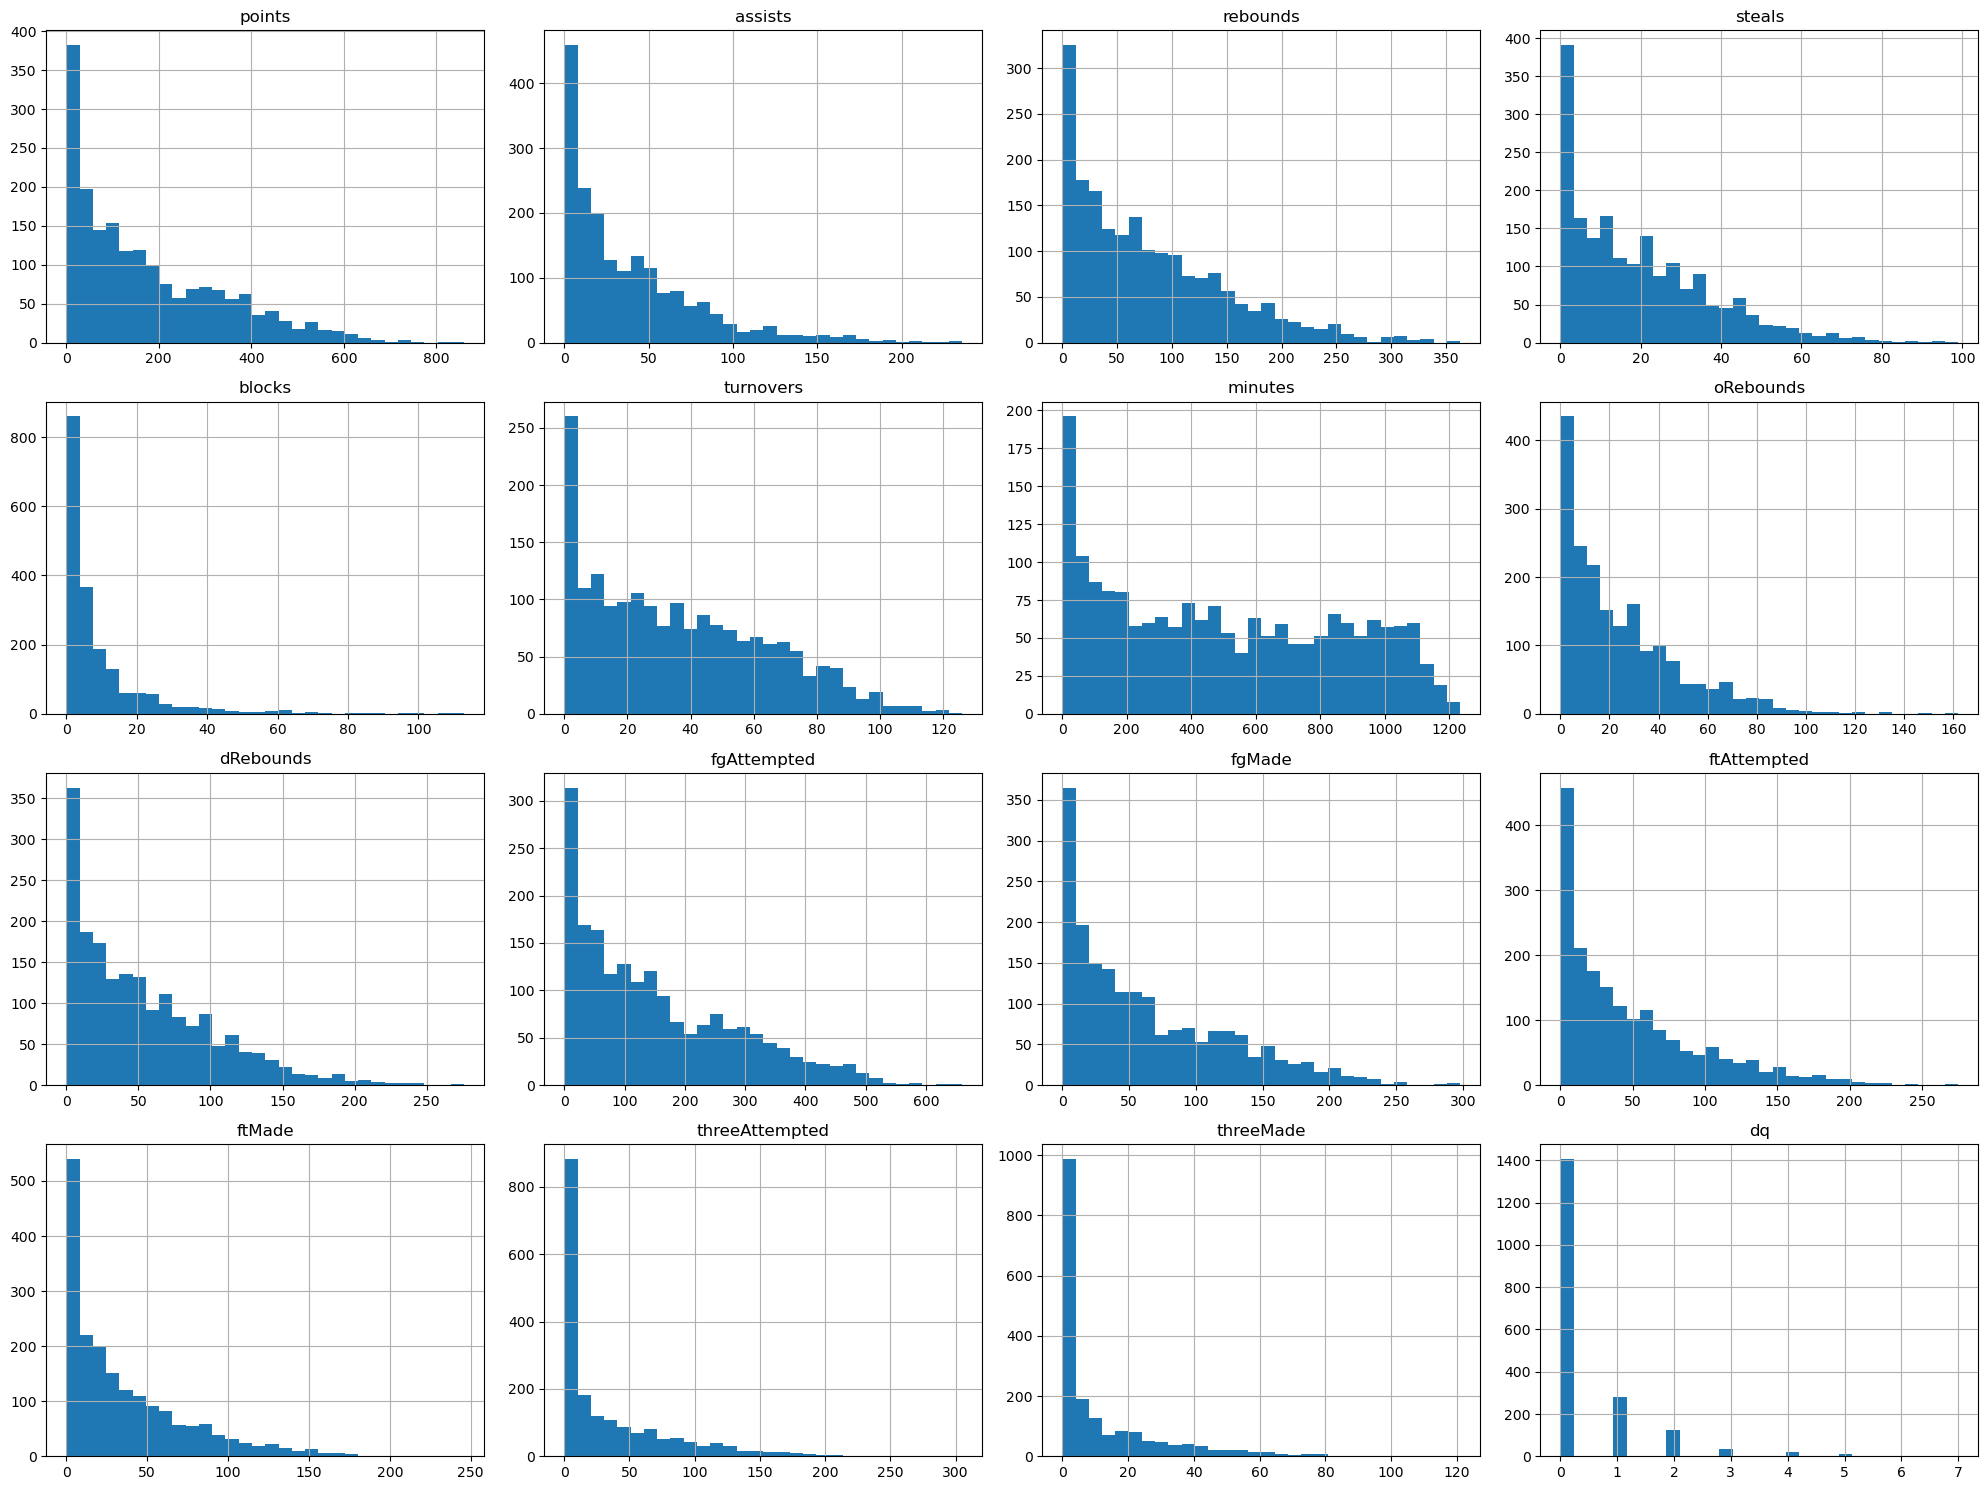

In [12]:
# Selecting the player performance metrics columns
player_performance_columns = [
    'points', 'assists', 'rebounds', 'steals', 'blocks', 'turnovers', 'minutes',
    'oRebounds', 'dRebounds', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade',
    'threeAttempted', 'threeMade', 'dq'
]

# Filtering the dataframe to include only these columns
player_performance_df = combined_df_sorted[player_performance_columns]

# Creating histograms for the player performance metrics columns
player_performance_df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()

# Save the plot to a file
plt.savefig('player_performance_histograms.png')  # Save as PNG format
plt.show()

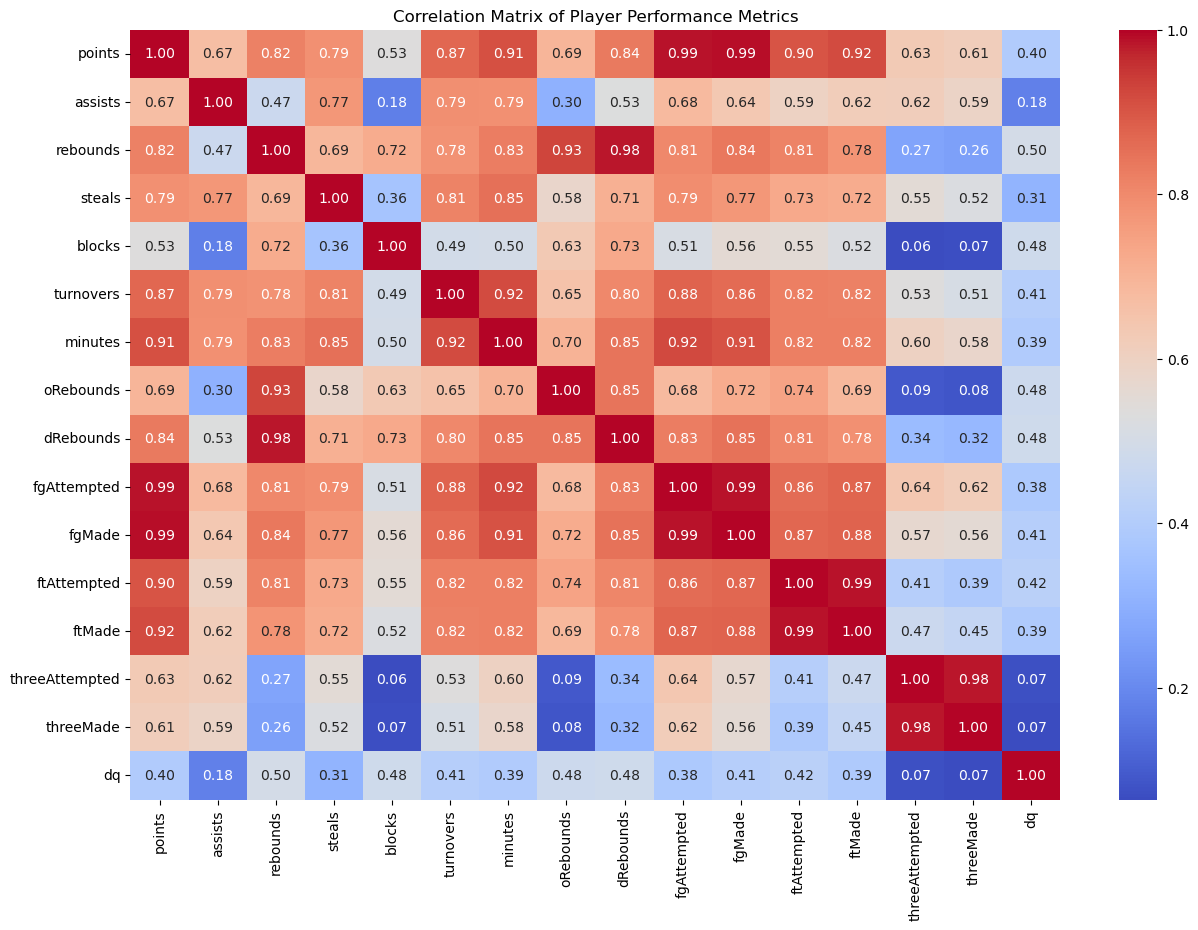

In [13]:
#Correlation matrix
player_performance_df = combined_df_sorted[player_performance_columns]

# Calculating the correlation matrix
corr_matrix = player_performance_df.corr()

# Creating the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Player Performance Metrics')


plt.savefig('Correlation Matrix of Player Performance Metrics')
plt.show()

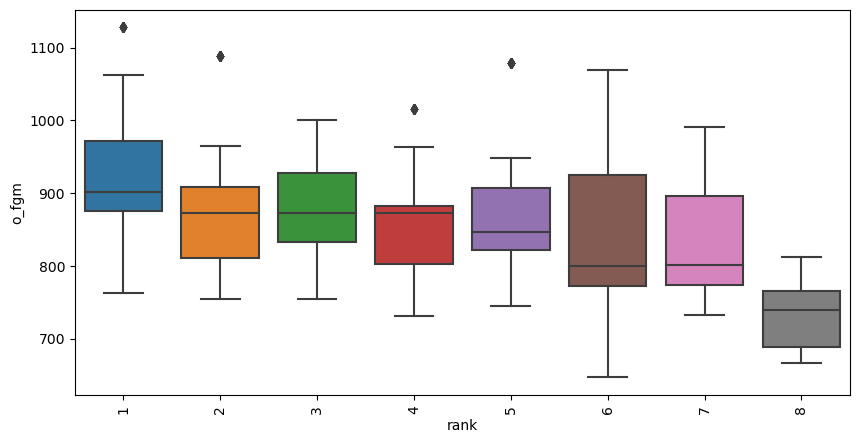

In [14]:
#Box Plot of field goals made and team rank
plt.figure(figsize=(10, 5))
sns.boxplot(x='rank', y='o_fgm', 
            data=combined_df_sorted)
plt.xticks(rotation=90)
plt.show()

### DATA PREPROCESSING

In this section, we preprocess the dataset to prepare it for analysis. The preprocessing steps begin by creating a copy of the original sorted data frame to preserve the initial data. We then filter the sorted data for each season (from 1 to 10) and extract the unique team IDs,this is to confirm that teams that participated in previous seasons are also present in the next season since we will be updating the previous season's statistic into the next season. This is achieved by defining a function to parse statistics and generate new data frames for each season based on the previous season's statistics. These new data frames are then concatenated into a single data frame, and then we drop unnecessary columns (having season 2 to 11).

To make the data suitable for analysis, we convert the 'playoff' column to binary values (1 for 'Y' and 0 for 'N') and apply normalization to the numerical columns using the MinMaxScaler from the scikit-learn library. This scaling method ensures that all performance metrics are on a similar scale of 0 to 1, which is essential for machine learning model development.

In [15]:
wnba_data = combined_df_sorted.copy()

In [16]:
#select season 1 statistic
season_2_data = wnba_data[wnba_data['year'] == 1]
#Get the unique teams in season 1 data
unique_teams_season_2 = season_2_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 2:")
print(unique_teams_season_2)

Unique teams in season 2:
['MIA' 'WAS' 'IND' 'POR' 'CLE' 'PHO' 'MIN' 'UTA' 'DET' 'SAC' 'LAS' 'NYL'
 'ORL' 'HOU' 'CHA' 'SEA']


In [17]:
#select season 2 statistic
season_3_data = wnba_data[wnba_data['year'] == 2]

#Get the unique teams in season 2 data
unique_teams_season_3 = season_3_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 3:")
print(unique_teams_season_3)

Unique teams in season 3:
['MIN' 'IND' 'MIA' 'DET' 'WAS' 'POR' 'HOU' 'SEA' 'PHO' 'SAC' 'CLE' 'ORL'
 'LAS' 'UTA' 'NYL' 'CHA']


In [18]:
#select season 3 statistic
season_4_data = wnba_data[wnba_data['year'] == 3]
#Get the unique teams in season 3 data
unique_teams_season_4 = season_4_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 4:")
print(unique_teams_season_4)

Unique teams in season 4:
['MIN' 'ORL' 'NYL' 'LAS' 'MIA' 'UTA' 'PHO' 'IND' 'POR' 'SAC' 'CLE' 'SEA'
 'DET' 'WAS' 'HOU' 'CHA']


In [19]:
#select season 4 statistic
season_5_data = wnba_data[wnba_data['year'] == 4]
#Get the unique teams in season 4 data
unique_teams_season_5 = season_5_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 5:")
print(unique_teams_season_5)

Unique teams in season 5:
['LAS' 'CLE' 'NYL' 'SAS' 'CHA' 'SEA' 'SAC' 'HOU' 'CON' 'MIN' 'DET' 'IND'
 'WAS' 'PHO']


In [20]:
#select season 5 statistic
season_6_data = wnba_data[wnba_data['year'] == 5]
#Get the unique teams in season 5 data
unique_teams_season_6 = season_6_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 6:")
print(unique_teams_season_6)

Unique teams in season 6:
['SEA' 'NYL' 'MIN' 'LAS' 'CON' 'SAC' 'WAS' 'DET' 'SAS' 'CHA' 'IND' 'PHO'
 'HOU']


In [21]:
#select season 6 statistic
season_7_data = wnba_data[wnba_data['year'] == 6]
#Get the unique teams in season 6 data
unique_teams_season_7 = season_7_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 7:")
print(unique_teams_season_7)

Unique teams in season 7:
['PHO' 'SAS' 'NYL' 'SEA' 'SAC' 'LAS' 'CON' 'IND' 'HOU' 'CHA' 'WAS' 'DET'
 'MIN']


In [22]:
#select season 7 statistic
season_8_data = wnba_data[wnba_data['year'] == 7]
#Get the unique teams in season 7 data
unique_teams_season_8 = season_8_data['tmID'].unique()

# Display the unique teams in season 7 data
print("Unique teams in season 8:")
print(unique_teams_season_8)

Unique teams in season 8:
['PHO' 'MIN' 'WAS' 'DET' 'HOU' 'NYL' 'SAS' 'SEA' 'CON' 'LAS' 'SAC' 'IND'
 'CHA' 'CHI']


In [23]:
#select season 8 statistic
season_9_data = wnba_data[wnba_data['year'] == 8]
#Get the unique teams in season 8 data
unique_teams_season_9 = season_9_data['tmID'].unique()

# Display the unique teams in season 8 data
print("Unique teams in season 9:")
print(unique_teams_season_9)

Unique teams in season 9:
['WAS' 'CHI' 'SAC' 'SAS' 'PHO' 'CON' 'SEA' 'LAS' 'NYL' 'IND' 'MIN' 'DET'
 'HOU']


In [24]:
#select season 9 statistic
season_10_data = wnba_data[wnba_data['year'] == 9]
#Get the unique teams in season 9 data
unique_teams_season_10 =  season_10_data['tmID'].unique()

# Display the unique teams in season 1 data
print("Unique teams in season 10")
print(unique_teams_season_10)

Unique teams in season 10
['WAS' 'SAS' 'SEA' 'ATL' 'LAS' 'CON' 'DET' 'MIN' 'HOU' 'IND' 'PHO' 'SAC'
 'CHI' 'NYL']


In [25]:
teams_season_11_data = pd.read_csv("teams_season11.csv")
players_season_11_data = pd.read_csv("players_teams_season11.csv")

In [26]:
col_to_drop = ['lgID', 'name', 'arena']

teams_season_11_data = teams_season_11_data.drop(columns=col_to_drop)

col_to_drop2 = ['lgID', 'stint']

players_season_11_data = players_season_11_data.drop(columns=col_to_drop2)

In [27]:
season_11_data = pd.merge(teams_season_11_data, players_season_11_data, on=['year', 'tmID'])

In [28]:
# Filter the season 10 data
season_11_data_new = wnba_data[wnba_data['year'] == 10]

# Get the unique teams in season 11 data
unique_teams_season_11 = season_11_data['tmID'].unique()

# Get the unique teams in season 11 data
unique_teams_season_11_new = season_11_data_new['tmID'].unique()



unique_teams_season_11_new

array(['DET', 'WAS', 'CHI', 'ATL', 'CON', 'IND', 'PHO', 'NYL', 'MIN',
       'SAC', 'SAS', 'SEA', 'LAS'], dtype=object)

In [29]:
unique_teams_season_11

array(['ATL', 'CHI', 'CON', 'IND', 'LAS', 'MIN', 'NYL', 'PHO', 'SAS',
       'SEA', 'TUL', 'WAS'], dtype=object)

In [30]:
# Define function to organize the statistics by team ID and return a DataFrame
def parse_statistics_df(season_stats_df):
    team_statistics = []
    for _, row in season_stats_df.iterrows():
        tmID = row['tmID']
        team_stats = row.copy()  # Make a copy of the row
        team_stats['tmID'] = tmID  # Update the team ID
        team_statistics.append(team_stats)
    return pd.DataFrame(team_statistics)

In [31]:
# Populate season 2 with season 1 statistics
season_2_data = parse_statistics_df(season_2_data)

In [32]:
season_3_data = parse_statistics_df(season_3_data)

In [33]:
season_4_data = parse_statistics_df(season_4_data)

In [34]:
season_5_data = parse_statistics_df(season_5_data)

In [35]:
season_6_data = parse_statistics_df(season_6_data)

In [36]:
season_7_data = parse_statistics_df(season_7_data)

In [37]:
season_8_data = parse_statistics_df(season_8_data)

In [38]:
season_9_data = parse_statistics_df(season_9_data)

In [39]:
season_10_data = parse_statistics_df(season_10_data)

In [40]:
season_11_data = parse_statistics_df(season_11_data_new)

In [41]:
col_to_drop = ['playerID']
combined_df = combined_df.drop(columns=col_to_drop)

In [42]:
season_11_data.head()

,year,tmID,franchID,confID,rank,playoff,name,o_fgm,o_fga,o_ftm,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
1711,10,DET,DET,EA,3,Y,Detroit Shock,980,2277,539,...,0,0,0,0,0,0,0,0,0,0
1712,10,WAS,WAS,EA,4,Y,Washington Mystics,933,2205,580,...,1,7,10,12,7,3,3,0,0,1
1713,10,WAS,WAS,EA,4,Y,Washington Mystics,933,2205,580,...,0,1,1,2,1,0,0,2,1,0
1714,10,WAS,WAS,EA,4,Y,Washington Mystics,933,2205,580,...,1,3,8,15,2,7,6,3,0,0
1715,10,WAS,WAS,EA,4,Y,Washington Mystics,933,2205,580,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Combine all new data frames into one
combined_df = pd.concat([season_2_data, season_3_data, season_4_data, season_5_data,
                         season_6_data, season_7_data, season_8_data, season_9_data,
                        season_10_data, season_11_data])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

# Replace 'Y' with 1 and 'N' with 0 in the 'playoff' column
combined_df['playoff'] = combined_df['playoff'].replace({'Y': 1, 'N': 0})
#combined_df.info()

In [44]:
col = ['playerID']

combined_df = combined_df.drop(columns = col)

In [45]:
from sklearn.preprocessing import MinMaxScaler

# Drop specified columns (these columns contain zero entries)
combined_df = combined_df.drop(columns=['tmORB', 'tmDRB', 'tmTRB', 
                                        'opptmORB', 'opptmDRB', 'opptmTRB'])
combined_df.columns[combined_df.columns.duplicated()]

##Scaling using MinMax method
excluded_columns = ['year', 'tmID', 'franchID', 'confID', 'rank', 
                    'playoff', 'name', 'arena']
selected_columns = combined_df.columns[~combined_df.columns.isin(excluded_columns)]
scaler = MinMaxScaler()
combined_df[selected_columns] = scaler.fit_transform(combined_df[selected_columns])
combined_df.head()

,year,tmID,franchID,confID,rank,playoff,name,o_fgm,o_fga,o_ftm,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,1,MIA,MIA,EA,6,0,Miami Sol,0.000000,0.045638,0.355224,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,WAS,WAS,EA,4,1,Washington Mystics,0.384615,0.097987,0.208955,...,0.0,0.117647,0.023256,0.015957,0.012195,0.029412,0.000000,0.000000,0.0,0.0
2,1,WAS,WAS,EA,4,1,Washington Mystics,0.384615,0.097987,0.208955,...,0.0,0.029412,0.069767,0.058511,0.060976,0.117647,0.064516,0.035294,0.0,0.0
3,1,IND,IND,EA,7,0,Indiana Fever,0.309771,0.131544,0.283582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,IND,IND,EA,7,0,Indiana Fever,0.309771,0.131544,0.283582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


### Machine Learning Algorithm

In [46]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeClassifier

In [47]:
# Split the data into training and testing sets based on the year 

# Ensure 'year' column is numeric
combined_df['year'] = pd.to_numeric(combined_df['year'], errors='coerce')

# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 7)]
test_df = combined_df[(combined_df['year'] >= 8) & (combined_df['year'] <= 10)]


# Verify the split
print("Unique years in train_df:", train_df['year'].unique())
print("Unique years in test_df:", test_df['year'].unique())

Unique years in train_df: [1 2 3 4 5 6 7]
Unique years in test_df: [ 8  9 10]


In [48]:

# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']

In [49]:
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']

In [50]:
from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()
# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_

In [51]:

# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=100),
                          n_features_to_select=30)

In [52]:
# Lists to store train and test indices
train_indices = []
test_indices = []
# Iterate over the splits
for train_index, test_index in tscv.split(combined_df):
    # Get the years corresponding to the indices
    train_years = combined_df.iloc[train_index]['year']
    test_years = combined_df.iloc[test_index]['year']
    
# Check if the conditions for train and test data are met
train_condition = (train_years >=1 ) & (train_years <= 7)
test_condition = (test_years >= 8) & (test_years <= 10)


# Append indices satisfying the conditions
train_indices.append(train_index[train_condition])
test_indices.append(test_index[test_condition])

# Concatenate the indices
final_train_indices = np.concatenate(train_indices)
final_test_indices = np.concatenate(test_indices)

# Use these indices to split your data
train_df = combined_df.iloc[final_train_indices]
test_df = combined_df.iloc[final_test_indices]

In [53]:
# Get the selected feature indices
selected_feature_indices = sfs.get_support()

train_df_selected = train_df[selected_columns]
# Get the column names of the selected features
selected_features = train_df_selected.columns[selected_feature_indices]

# Convert to a list if needed
selected_features_list = selected_features.tolist()

# Print or use the selected features
print("Selected features:", selected_features_list)

Selected features: ['won', 'lost', 'homeW', 'confL', 'stint', 'GP_y', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade', 'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade', 'dq', 'PostGP', 'PostdRebounds', 'PostAssists', 'PostBlocks', 'PostPF', 'PostftMade', 'PostthreeMade', 'PostDQ']


In [54]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_11 = test_df[test_df['year'] == 10][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_11)
predictions

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

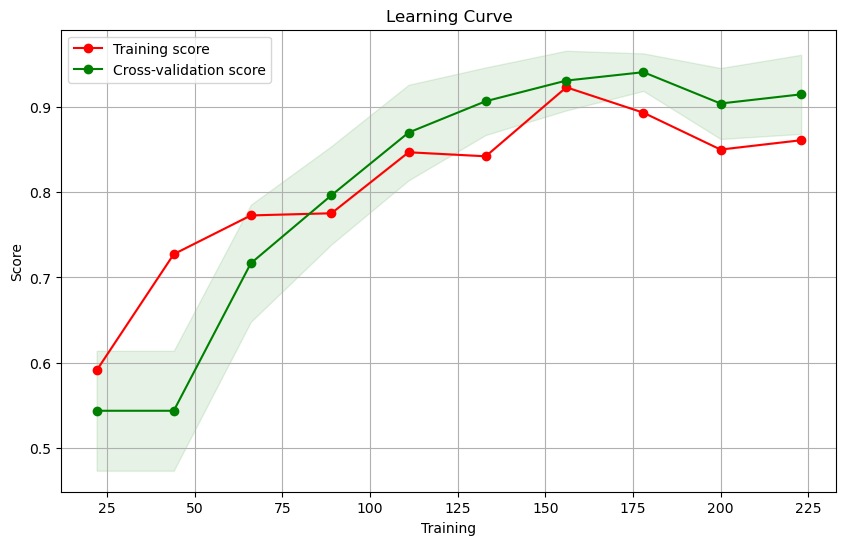

In [55]:
from sklearn.model_selection import learning_curve
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

Learning Curves: Plot the model's performance (e.g., accuracy or loss) on the training and validation sets as a function of the training dataset size. If the training performance continues to improve while the validation performance plateaus or deteriorates, it suggests overfitting.

When the training score starts higher than the cross-validation score and eventually intersects with it, it suggests that the model is initially overfitting the training data. This means that the model is learning the training data too well, capturing noise or irrelevant patterns that do not generalize to unseen data.

As the training set size increases, the training score tends to decrease, while the cross-validation score tends to increase. The intersection point indicates the optimal point where the model's performance on the training and validation sets is balanced. After this point, the model's performance on the training set deteriorates because it is becoming less capable of capturing the noise or irrelevant patterns present in the training data. However, the cross-validation score continues to increase, indicating that the model generalizes better to unseen data as more training examples are provided.

In summary, when the training score initially starts higher than the cross-validation score and eventually intersects with it, it suggests that the model is overfitting the training data initially but generalizes well to unseen data as more training examples are provided.

## Predictions

### Season 11 predictions

In [56]:
season_11_data = test_df[test_df['year'] == 10]
selected_features_season11 = season_11_data[selected_features_list]
X_season11 = selected_features_season11

In [57]:
# Use the trained model to make predictions
predictions_season11 = best_rr.predict(X_season11)
actual_playoff = test_df.loc[:, 'playoff']

In [58]:
season_11_data['Predicted_Playoff'] = predictions_season11
season_11_data['Actual_Playoff'] = actual_playoff

# Display the updated DataFrame
#season_11_data

C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\3249245524.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_11_data['Predicted_Playoff'] = predictions_season11
C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\3249245524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_11_data['Actual_Playoff'] = actual_playoff


In [59]:
# Filter only predicted playoff teams
playoff_teams = season_11_data[season_11_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 
                                                  'confID', 'name']).size().reset_index(name='predicted_playoff_count')
# Convert playoff counts to integers (ensuring no decimal points)
#predicted_playoff_counts['predicted_playoff_count'] = predicted_playoff_counts['predicted_playoff_count'].astype(int)

# Count the number of actual playoff appearances for each team
actual_playoff_counts = season_11_data.groupby(['tmID', 'franchID', 
                                                'confID', 'name'])['playoff'].sum().reset_index(name='actual_playoff_count')

# Merge the actual and predicted playoff counts
playoff_counts = pd.merge(predicted_playoff_counts, actual_playoff_counts, 
                          on=['tmID', 'franchID', 'confID', 'name'], how='left')

# Select the top 4 teams from each conference based on predicted playoff counts
playoff_teams_eastern = playoff_counts[playoff_counts['confID'] == 'EA']
playoff_teams_western = playoff_counts[playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
final_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)



In [60]:
# Update the value in the 'tmID' column
final_playoff_teams.loc[final_playoff_teams['tmID'] == 'DET', 'tmID'] = 'TUL'
final_playoff_teams = final_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [61]:
# Display the final selected playoff teams with their actual and predicted playoff counts
final_playoff_teams

,tmID,franchID,confID,name
0,ATL,ATL,EA,Atlanta Dream
1,TUL,DET,EA,Detroit Shock
2,IND,IND,EA,Indiana Fever
3,WAS,WAS,EA,Washington Mystics
4,LAS,LAS,WE,Los Angeles Sparks
5,PHO,PHO,WE,Phoenix Mercury
6,SAS,SAS,WE,San Antonio Silver Stars
7,SEA,SEA,WE,Seattle Storm


      Metric     Score
0   Accuracy  0.939394
1  Precision  1.000000
2     Recall  0.901961
3   F1 Score  0.948454


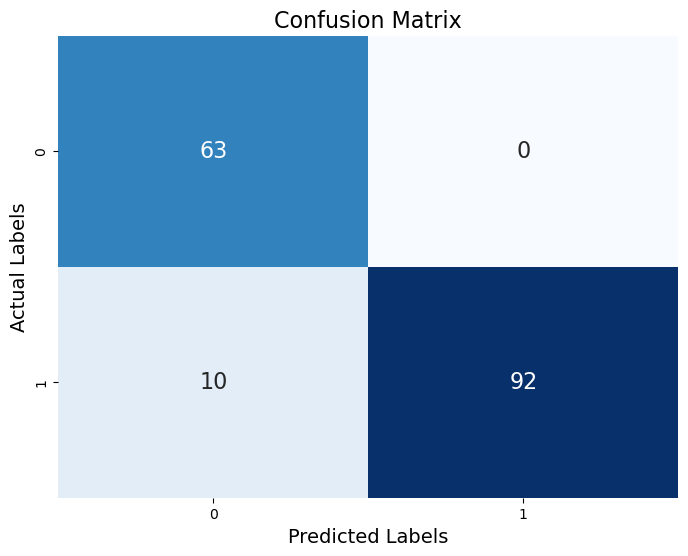

In [62]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score
# Calculate confusion matrix
conf_matrix = confusion_matrix(season_11_data['Actual_Playoff'], season_11_data['Predicted_Playoff'])

# Calculate additional metrics
accuracy = accuracy_score(season_11_data['Actual_Playoff'], season_11_data['Predicted_Playoff'])
precision = precision_score(season_11_data['Actual_Playoff'], season_11_data['Predicted_Playoff'])
recall = recall_score(season_11_data['Actual_Playoff'], season_11_data['Predicted_Playoff'])
f1 = f1_score(season_11_data['Actual_Playoff'], season_11_data['Predicted_Playoff'])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [accuracy, precision, recall, f1]
})

print(metrics_df)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('Actual Labels', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.show()

### SEASON 10 Predictions

In [63]:
season_10_data = test_df[(test_df['year'] >= 9) & (test_df['year'] == 10)]
selected_features_season10 = season_10_data[selected_features_list]
X_season10 = selected_features_season10

In [64]:
# Use the trained model to make predictions
predictions_season10 = best_rr.predict(X_season10)
actual_playoff = test_df.loc[:, 'playoff']

In [65]:
# Assign predicted playoff and actual playoff values using .loc
season_10_data.loc[:, 'Predicted_Playoff'] = predictions_season10
season_10_data.loc[:, 'Actual_Playoff'] = actual_playoff

C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\3047930267.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_10_data.loc[:, 'Predicted_Playoff'] = predictions_season10
C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\3047930267.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_10_data.loc[:, 'Actual_Playoff'] = actual_playoff


In [66]:
# Filter only predicted playoff teams
playoff_teams = season_10_data[season_10_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Count the number of actual playoff appearances for each team
actual_playoff_counts = season_11_data.groupby(['tmID',
                                                'franchID', 'confID', 'name']
                                              )['playoff'].size().reset_index(name='actual_playoff_count')

# Merge the actual and predicted playoff counts
playoff_counts = pd.merge(predicted_playoff_counts, actual_playoff_counts, on=
                          ['tmID', 'franchID', 'confID', 'name'], how='left')

In [67]:
# Select the top 4 teams from each conference based on predicted playoff counts
playoff_teams_eastern = playoff_counts[playoff_counts['confID'] == 'EA']
playoff_teams_western = playoff_counts[playoff_counts['confID'] == 'WE']


# Concatenate the selected teams to get the final playoff teams
season10_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)


In [68]:
season10_playoff_teams = season10_playoff_teams[['tmID', 'franchID', 'confID', 'name',
'predicted_playoff_count']]

In [69]:
# Display the final selected playoff teams 
season10_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,ATL,ATL,EA,Atlanta Dream,12
1,DET,DET,EA,Detroit Shock,17
2,IND,IND,EA,Indiana Fever,14
3,WAS,WAS,EA,Washington Mystics,6
4,LAS,LAS,WE,Los Angeles Sparks,11
5,PHO,PHO,WE,Phoenix Mercury,12
6,SAS,SAS,WE,San Antonio Silver Stars,7
7,SEA,SEA,WE,Seattle Storm,13


In [70]:
# Replace NaN values in 'actual_playoff_count' column with 14
#season10_playoff_teams['actual_playoff_count'] = season10_playoff_teams['actual_playoff_count'].fillna(14)

### Season 8 Predictions

In [71]:
season_8_data = test_df[(test_df['year'] >= 8) & (test_df['year'] == 10)]
selected_features_season8 = season_8_data[selected_features_list]
X_season8 = selected_features_season8

#Use the trained model to make predictions
predictions_season8 = best_rr.predict(X_season8)
actual_playoff = test_df.loc[:, 'playoff']

season_8_data['Predicted_Playoff'] = predictions_season8
season_8_data['Actual_Playoff'] = actual_playoff


C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\610435732.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_8_data['Predicted_Playoff'] = predictions_season8
C:\Users\Dell\AppData\Local\Temp\ipykernel_11316\610435732.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  season_8_data['Actual_Playoff'] = actual_playoff


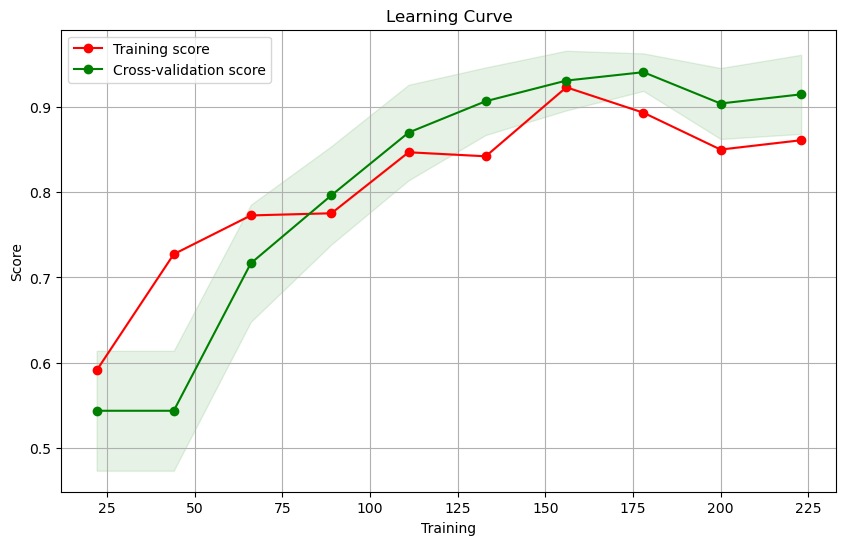

In [72]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [73]:
# Filter only predicted playoff teams
playoff_teams = season_8_data[season_8_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 
                                                  'franchID', 'confID',
                                                  'name']).size().reset_index(name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'EA']
playoff_teams_western = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
season8_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)


In [74]:
#season8_playoff_teams = season8_playoff_teams[['tmID', 'franchID', 'confID', 'name']]
# Print the result
season8_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,ATL,ATL,EA,Atlanta Dream,12
1,DET,DET,EA,Detroit Shock,17
2,IND,IND,EA,Indiana Fever,14
3,WAS,WAS,EA,Washington Mystics,6
4,LAS,LAS,WE,Los Angeles Sparks,11
5,PHO,PHO,WE,Phoenix Mercury,12
6,SAS,SAS,WE,San Antonio Silver Stars,7
7,SEA,SEA,WE,Seattle Storm,13


### Season 9 Predictions

In [75]:
season_9_data =  test_df[(test_df['year'] >= 9) & (test_df['year'] <= 10)]
selected_features_season9 = season_9_data[selected_features_list]
X_season9 = selected_features_season9

In [76]:
# Use the trained model to make predictions
predictions_season9 = best_rr.predict(X_season9)
actual_playoff = test_df.loc[:, 'playoff']

In [77]:
# Assign predicted playoff and actual playoff values using .loc
season_9_data.loc[:, 'Predicted_Playoff'] = predictions_season9
season_9_data.loc[:, 'Actual_Playoff'] = actual_playoff

In [78]:
# Filter only predicted playoff teams
playoff_teams = season_9_data[season_9_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Convert playoff counts to integers (ensuring no decimal points)
predicted_playoff_counts['predicted_playoff_count'] = predicted_playoff_counts[
    'predicted_playoff_count'].astype(int)

# Convert playoff counts to integers (ensuring no decimal points)
actual_playoff_counts['actual_playoff_count'] = actual_playoff_counts[
    'actual_playoff_count'].astype(int)

# Count the number of actual playoff appearances for each team
actual_playoff_counts = season_11_data.groupby(['tmID',
                                                'franchID', 'confID', 'name']
                                              )['playoff'].size().reset_index(name='actual_playoff_count')

# Merge the actual and predicted playoff counts
playoff_counts = pd.merge(predicted_playoff_counts, actual_playoff_counts, on=
                          ['tmID', 'franchID', 'confID', 'name'], how='left')

In [79]:
# Select the top 4 teams from each conference based on predicted playoff counts
playoff_teams_eastern = playoff_counts[playoff_counts['confID'] == 'EA']
playoff_teams_western = playoff_counts[playoff_counts['confID'] == 'WE']


# Concatenate the selected teams to get the final playoff teams
season9_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)

In [80]:
season9_playoff_teams = season9_playoff_teams[['tmID', 'franchID', 'confID', 'name', "predicted_playoff_count"]]

In [81]:
season9_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,ATL,ATL,EA,Atlanta Dream,12
1,CON,CON,EA,Connecticut Sun,9
2,DET,DET,EA,Detroit Shock,36
3,IND,IND,EA,Indiana Fever,29
4,NYL,NYL,EA,New York Liberty,13
5,WAS,WAS,EA,Washington Mystics,6
6,HOU,HOU,WE,Houston Comets,12
7,LAS,LAS,WE,Los Angeles Sparks,17
8,PHO,PHO,WE,Phoenix Mercury,12
9,SAC,SAC,WE,Sacramento Monarchs,13


### Season 2 Predictions

In [82]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] == 1)]
test_df = combined_df[(combined_df['year'] == 2)]

In [83]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']

In [84]:
from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=0.01),
                          n_features_to_select=30)

In [85]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_2 = test_df[test_df['year'] == 2][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_2)
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

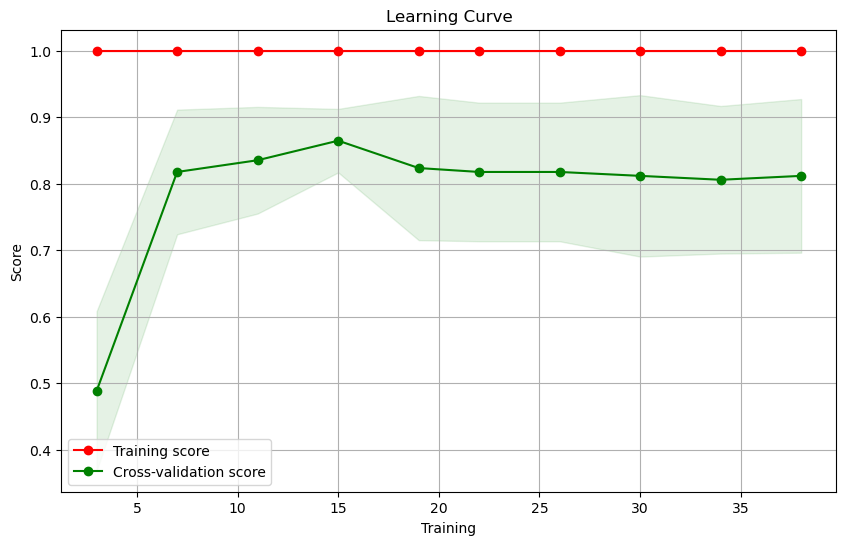

In [86]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [87]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] == 1)]
test_df = combined_df[(combined_df['year'] == 2)]

In [88]:
season_2_data = test_df[test_df['year'] == 2]
selected_features_season2 = season_2_data[selected_features_list]
X_season2 = selected_features_season2

# Use the trained model to make predictions
predictions_season2 = best_rr.predict(X_season2)
actual_playoff = test_df.loc[:, 'playoff']

season_2_data['Predicted_Playoff'] = predictions_season2
season_2_data['Actual_Playoff'] = actual_playoff

In [89]:
# Filter only predicted playoff teams
playoff_teams = season_2_data[season_2_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 
                                                  'franchID', 
                                                  'confID', 
                                                  'name']).size().reset_index(
    name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[
    predicted_playoff_counts['confID'] == 'EA'].nlargest(4,
                                                         'predicted_playoff_count')
playoff_teams_western = predicted_playoff_counts[
    predicted_playoff_counts['confID'] == 'WE'].nlargest(4, 'predicted_playoff_count')

# Concatenate the selected teams to get the final playoff teams
season2_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)

# Print the result
season2_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,CLE,CLE,EA,Cleveland Rockers,15
1,NYL,NYL,EA,New York Liberty,15
2,CHA,CHA,EA,Charlotte Sting,12
3,MIA,MIA,EA,Miami Sol,12
4,SAC,SAC,WE,Sacramento Monarchs,13
5,HOU,HOU,WE,Houston Comets,11
6,LAS,LAS,WE,Los Angeles Sparks,11
7,UTA,SAS,WE,Utah Starzz,9


### Season 3 Predictions

In [90]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 2)]
test_df = combined_df[(combined_df['year'] == 3)]

In [91]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']

In [92]:
from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=1),
                          n_features_to_select=30)

In [93]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_3 = test_df[test_df['year'] == 3][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_3)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

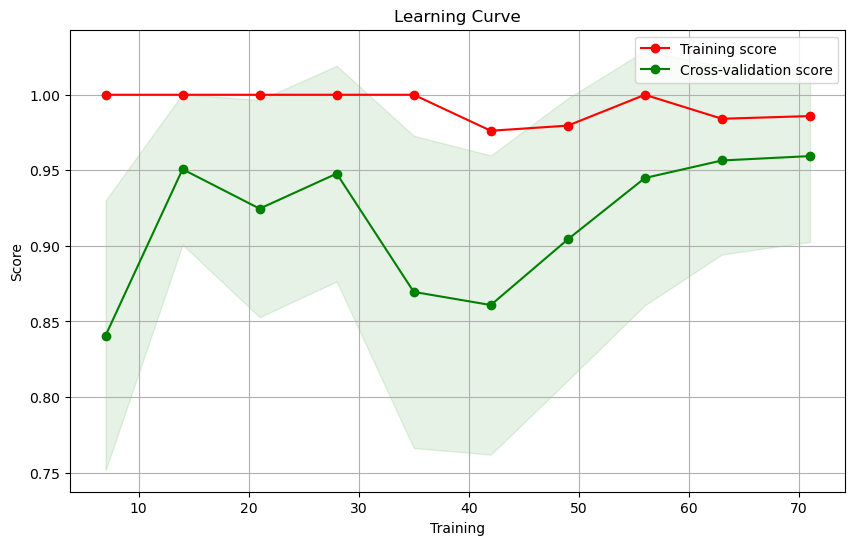

In [94]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [95]:
season_3_data = test_df[test_df['year'] == 3]
selected_features_season3 = season_3_data[selected_features_list]
X_season3 = selected_features_season3

# Use the trained model to make predictions
predictions_season3 = best_rr.predict(X_season3)
actual_playoff = test_df.loc[:, 'playoff']

season_3_data['Predicted_Playoff'] = predictions_season3
season_3_data['Actual_Playoff'] = actual_playoff

In [96]:
# Filter only predicted playoff teams
playoff_teams = season_3_data[season_3_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 
                                                  'franchID', 
                                                  'confID', 
                                                  'name']).size().reset_index(
    name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[
    predicted_playoff_counts['confID'] == 'EA'].nlargest(4,
                                                         'predicted_playoff_count')
playoff_teams_western = predicted_playoff_counts[
    predicted_playoff_counts['confID'] == 'WE'].nlargest(4, 'predicted_playoff_count')

# Concatenate the selected teams to get the final playoff teams
season3_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)

# Print the result
season3_playoff_teams


,tmID,franchID,confID,name,predicted_playoff_count
0,WAS,WAS,EA,Washington Mystics,13
1,CHA,CHA,EA,Charlotte Sting,12
2,IND,IND,EA,Indiana Fever,12
3,NYL,NYL,EA,New York Liberty,11
4,HOU,HOU,WE,Houston Comets,14
5,LAS,LAS,WE,Los Angeles Sparks,13
6,UTA,SAS,WE,Utah Starzz,13
7,SEA,SEA,WE,Seattle Storm,6


In [97]:
#season3_playoff_teams = season3_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [98]:
# Print the result
season3_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,WAS,WAS,EA,Washington Mystics,13
1,CHA,CHA,EA,Charlotte Sting,12
2,IND,IND,EA,Indiana Fever,12
3,NYL,NYL,EA,New York Liberty,11
4,HOU,HOU,WE,Houston Comets,14
5,LAS,LAS,WE,Los Angeles Sparks,13
6,UTA,SAS,WE,Utah Starzz,13
7,SEA,SEA,WE,Seattle Storm,6


In [99]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
#Calculate confusion matrix
conf_matrix = confusion_matrix(season_3_data['Actual_Playoff'], season_3_data['Predicted_Playoff'])


# Calculate precision
precision = precision_score(season_3_data['Actual_Playoff'], season_3_data['Predicted_Playoff'])

# Calculate F1 score
f1 = f1_score(season_3_data['Actual_Playoff'], season_3_data['Predicted_Playoff'])

# Calculate True Positives, False Positives, True Negatives, False Negatives
tp = conf_matrix[1, 1]
fp = conf_matrix[0, 1]
tn = conf_matrix[0, 0]
fn = conf_matrix[1, 0]

# Calculate Accuracy, Precision, Recall
accuracy = (tp + tn) / (tp + fp + tn + fn)
recall = tp / (tp + fn)

# Create a DataFrame to store the results
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1 Score'],
    'Value': [accuracy, recall, precision, f1]
})

# Print the results
results


,Metric,Value
0,Accuracy,0.894009
1,Recall,0.886792
2,Precision,0.895238
3,F1 Score,0.890995


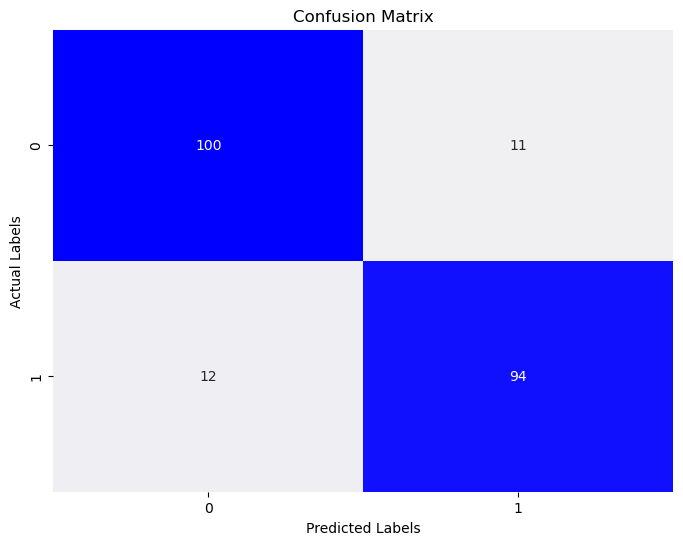

In [100]:
cmap = sns.light_palette("blue", as_cmap=True)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

### Season 4 Predictions

In [101]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 3)]
test_df = combined_df[(combined_df['year'] == 4)]

In [102]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']


from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=100),
                          n_features_to_select=30)

In [103]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_4 = test_df[test_df['year'] == 4][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_4)
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0], dtype=int64)

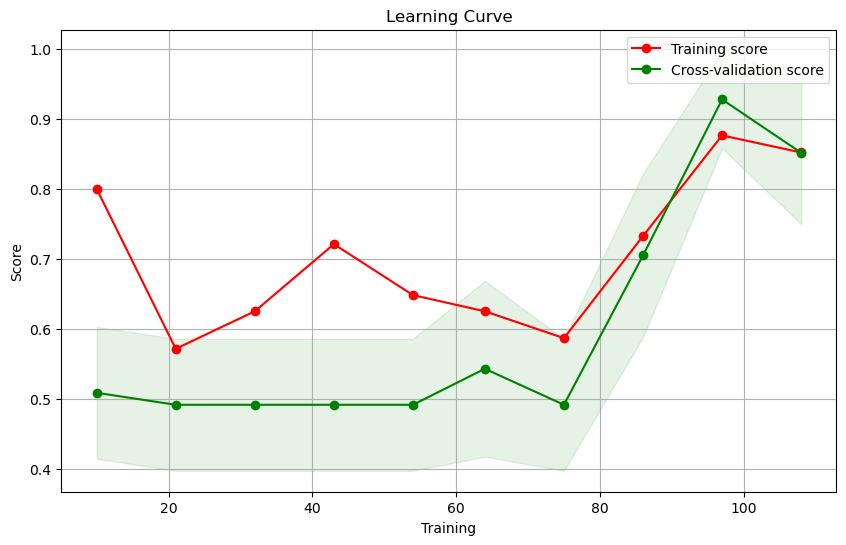

In [104]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [105]:
season_4_data = test_df[test_df['year'] == 4]
selected_features_season4 = season_4_data[selected_features_list]
X_season4 = selected_features_season4

# Use the trained model to make predictions
predictions_season4 = best_rr.predict(X_season4)
actual_playoff = test_df.loc[:, 'playoff']

season_4_data['Predicted_Playoff'] = predictions_season4
season_4_data['Actual_Playoff'] = actual_playoff

In [106]:
# Filter only predicted playoff teams
playoff_teams = season_4_data[season_4_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 
                                                  'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'EA']
playoff_teams_western = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
season4_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)

In [107]:
season4_playoff_teams = season4_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [108]:
# Print the result
season4_playoff_teams

,tmID,franchID,confID,name
0,CHA,CHA,EA,Charlotte Sting
1,CLE,CLE,EA,Cleveland Rockers
2,CON,CON,EA,Connecticut Sun
3,DET,DET,EA,Detroit Shock
4,HOU,HOU,WE,Houston Comets
5,LAS,LAS,WE,Los Angeles Sparks
6,MIN,MIN,WE,Minnesota Lynx
7,SAC,SAC,WE,Sacramento Monarchs


#### Season 5 Predictions

In [109]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 4)]
test_df = combined_df[(combined_df['year'] == 5)]

In [110]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']


from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=100),
                          n_features_to_select=30)

In [111]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_5 = test_df[test_df['year'] == 5][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_5)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

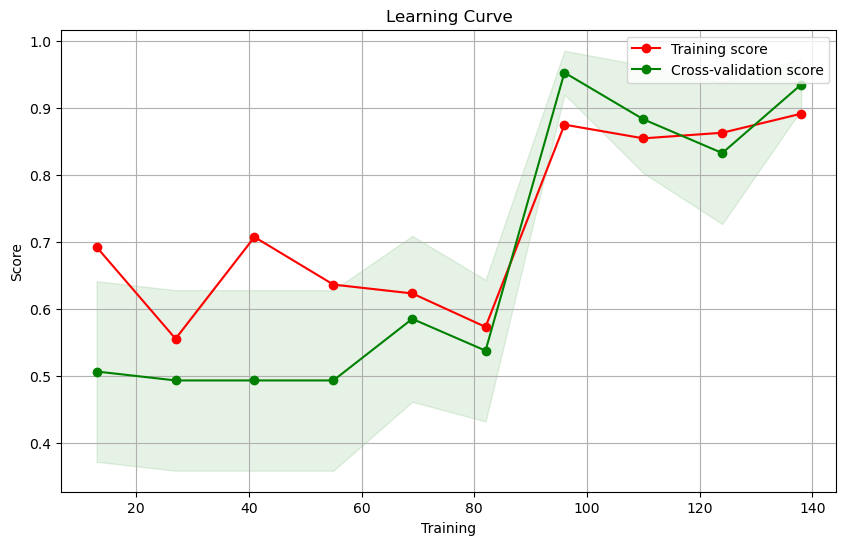

In [112]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [113]:
season_5_data = test_df[test_df['year'] == 5]
selected_features_season5 = season_5_data[selected_features_list]
X_season5 = selected_features_season5

# Use the trained model to make predictions
predictions_season5 = best_rr.predict(X_season5)
actual_playoff = test_df.loc[:, 'playoff']

season_5_data['Predicted_Playoff'] = predictions_season5
season_5_data['Actual_Playoff'] = actual_playoff

In [114]:
# Filter only predicted playoff teams
playoff_teams = season_5_data[season_5_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'EA']
playoff_teams_western = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
season5_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)


In [115]:
season5_playoff_teams = season5_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [116]:
# Print the result
season5_playoff_teams

,tmID,franchID,confID,name
0,CON,CON,EA,Connecticut Sun
1,DET,DET,EA,Detroit Shock
2,NYL,NYL,EA,New York Liberty
3,WAS,WAS,EA,Washington Mystics
4,LAS,LAS,WE,Los Angeles Sparks
5,MIN,MIN,WE,Minnesota Lynx
6,SAC,SAC,WE,Sacramento Monarchs
7,SEA,SEA,WE,Seattle Storm


#### Season 6 Predictions

In [117]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 5)]
test_df = combined_df[(combined_df['year'] == 6)]

In [118]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']


from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=100),
                          n_features_to_select=30)

In [119]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_6 = test_df[test_df['year'] == 6][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_6)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

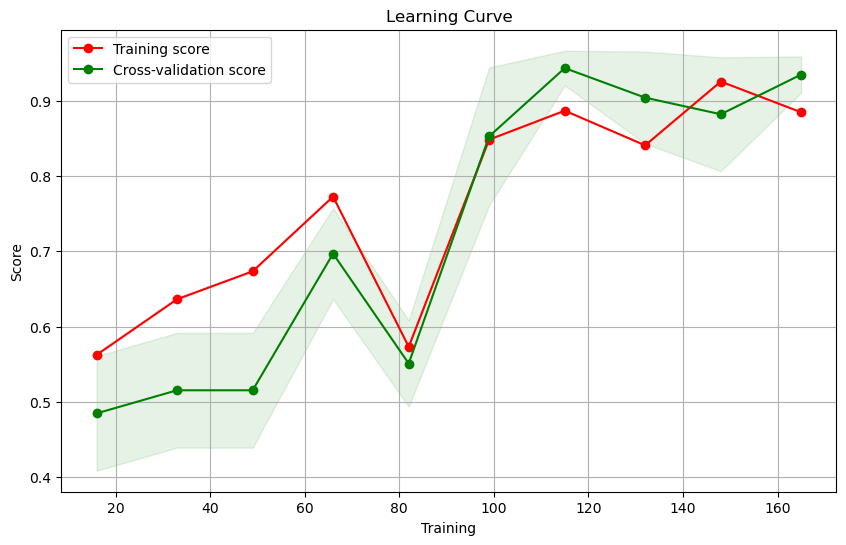

In [120]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [121]:
season_6_data = test_df[test_df['year'] == 6]
selected_features_season6 = season_6_data[selected_features_list]
X_season6 = selected_features_season6

# Use the trained model to make predictions
predictions_season6 = best_rr.predict(X_season6)
actual_playoff = test_df.loc[:, 'playoff']

season_6_data['Predicted_Playoff'] = predictions_season6
season_6_data['Actual_Playoff'] = actual_playoff

In [122]:
# Filter only predicted playoff teams
playoff_teams = season_6_data[season_6_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'EA']
playoff_teams_western = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
season6_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)

In [123]:
season6_playoff_teams = season6_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [124]:
# Print the result
season6_playoff_teams

,tmID,franchID,confID,name
0,CON,CON,EA,Connecticut Sun
1,DET,DET,EA,Detroit Shock
2,IND,IND,EA,Indiana Fever
3,NYL,NYL,EA,New York Liberty
4,HOU,HOU,WE,Houston Comets
5,LAS,LAS,WE,Los Angeles Sparks
6,SAC,SAC,WE,Sacramento Monarchs
7,SEA,SEA,WE,Seattle Storm


#### Season 7 Predictions

In [125]:
# Split the data into training and testing sets based on the year
train_df = combined_df[(combined_df['year'] >= 1) & (combined_df['year'] <= 6)]
test_df = combined_df[(combined_df['year'] >= 7) & (combined_df['year'] <= 10)]

In [126]:
# Define categorical and numerical features
categorical_features = ['tmID', 'franchID', 'confID', 'name', 'arena'] 
numeric_features = [col for col in train_df.columns if col not in 
                    categorical_features + ['playoff']]

# Separate features and target variable
all_features = categorical_features.copy()
all_features.extend(numeric_features)

X_train = train_df[all_features]
y_train = train_df['playoff']
X_test = test_df[all_features]
y_test = test_df['playoff']
# Check that the columns specified exist in the dataframe
missing_cols = [col for col in categorical_features +
                numeric_features if col not in train_df.columns]
if missing_cols:
    raise ValueError(f"Missing columns in train_df: {missing_cols}")

target = ['playoff']


from sklearn.model_selection import GridSearchCV
# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
# Define the Ridge Classifier
rr = RidgeClassifier()


# Hyperparameter tuning with GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
grid_search.fit(train_df[selected_columns], y_train)

# Best Ridge Classifier with optimal alpha
best_rr = grid_search.best_estimator_


# Initialize Sequential Feature Selector
sfs = SequentialFeatureSelector(
    best_rr,  # Ridge Classifier
    n_features_to_select=30,
    direction='forward',
    cv=tscv ) # TimeSeriesSplit for cross-validation

# Convert target to 1-dimensional array
y_train = train_df[target].values.ravel()
#Feature Engineering 
# Fit the Sequential Feature Selector
sfs.fit(train_df[selected_columns], y_train)

SequentialFeatureSelector(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
                          estimator=RidgeClassifier(alpha=100),
                          n_features_to_select=30)

In [127]:
best_rr.fit(train_df[selected_features_list], train_df['playoff'])

# Extract selected features for season 11
selected_features_season_7 = test_df[test_df['year'] == 7][selected_features_list]

# Make predictions using the trained Ridge Classifier
predictions = best_rr.predict(selected_features_season_7)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1], dtype=int64)

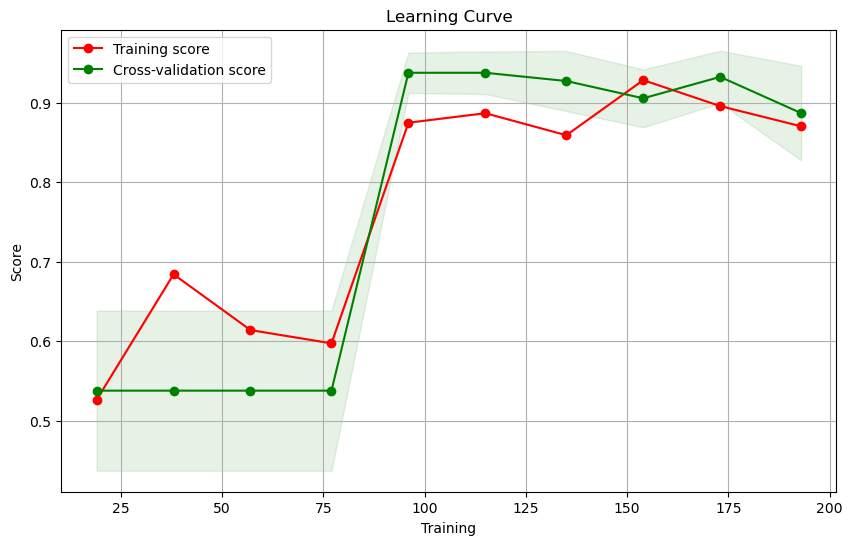

In [128]:
# Define the training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate learning curve
train_sizes_abs, train_scores, test_scores = learning_curve(
    best_rr, 
    train_df[selected_features_list], 
    train_df['playoff'], 
    train_sizes=train_sizes, 
    cv=tscv
)

# Calculate mean and standard deviation of training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
# Plot learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes_abs, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.1, color="r")
plt.fill_between(train_sizes_abs, 
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, 
                 alpha=0.1, color="g")
plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r", 
         label="Training score")
plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g", 
         label="Cross-validation score")
plt.xlabel("Training")
plt.ylabel("Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.grid()
plt.savefig('Learning Curve')
plt.show()

In [129]:
season_7_data = test_df[(test_df['year'] >= 7) & (test_df['year'] <= 10)]
selected_features_season7 = season_7_data[selected_features_list]
X_season7 = selected_features_season7

# Use the trained model to make predictions
predictions_season7 = best_rr.predict(X_season7)
actual_playoff = test_df.loc[:, 'playoff']

season_7_data['Predicted_Playoff'] = predictions_season7
season_7_data['Actual_Playoff'] = actual_playoff

In [130]:
# Filter only predicted playoff teams
playoff_teams = season_7_data[season_7_data['Predicted_Playoff'] == 1]

# Count the number of predicted playoff appearances for each team
predicted_playoff_counts = playoff_teams.groupby(['tmID', 'franchID', 'confID', 'name']
                                                ).size().reset_index(name='predicted_playoff_count')

# Separate teams by conference
playoff_teams_eastern = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'EA']
playoff_teams_western = predicted_playoff_counts[predicted_playoff_counts['confID'] == 'WE']

# Concatenate the selected teams to get the final playoff teams
season7_playoff_teams = pd.concat([playoff_teams_eastern, playoff_teams_western]).reset_index(drop=True)


In [131]:
#season7_playoff_teams = season7_playoff_teams[['tmID', 'franchID', 'confID', 'name']]

In [132]:
# Print the result
season7_playoff_teams

,tmID,franchID,confID,name,predicted_playoff_count
0,ATL,ATL,EA,Atlanta Dream,12
1,CON,CON,EA,Connecticut Sun,39
2,DET,DET,EA,Detroit Shock,63
3,IND,IND,EA,Indiana Fever,53
4,NYL,NYL,EA,New York Liberty,24
5,WAS,WAS,EA,Washington Mystics,18
6,HOU,HOU,WE,Houston Comets,24
7,LAS,LAS,WE,Los Angeles Sparks,40
8,PHO,PHO,WE,Phoenix Mercury,25
9,SAC,SAC,WE,Sacramento Monarchs,35


In [133]:
# Replace 'Y' with 1 and 'N' with 0 in the 'playoff' column
wnba_data['playoff'] = wnba_data['playoff'].replace({'Y': 1, 'N': 0})


# Drop specified columns (these columns contain zero entries)
wnba_data = wnba_data.drop(columns=['tmORB', 'tmDRB', 'tmTRB', 
                                        'opptmORB', 'opptmDRB', 'opptmTRB'])
wnba_data.columns[wnba_data.columns.duplicated()]


col = ['playerID']

wnba_data = wnba_data.drop(columns = col)
##Scaling using MinMax method
excluded_columns = ['year', 'tmID', 'franchID', 'confID', 'rank', 
                    'playoff', 'name', 'arena']
selected_columns = wnba_data.columns[~wnba_data.columns.isin(excluded_columns)]
scaler = MinMaxScaler()
wnba_data[selected_columns] = scaler.fit_transform(wnba_data[selected_columns])
wnba_data.head()

,year,tmID,franchID,confID,rank,playoff,name,o_fgm,o_fga,o_ftm,...,PostBlocks,PostTurnovers,PostPF,PostfgAttempted,PostfgMade,PostftAttempted,PostftMade,PostthreeAttempted,PostthreeMade,PostDQ
0,1,MIA,MIA,EA,6,0,Miami Sol,0.000000,0.045638,0.355224,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,1,WAS,WAS,EA,4,1,Washington Mystics,0.384615,0.097987,0.208955,...,0.0,0.117647,0.023256,0.015957,0.012195,0.029412,0.000000,0.000000,0.0,0.0
2,1,WAS,WAS,EA,4,1,Washington Mystics,0.384615,0.097987,0.208955,...,0.0,0.029412,0.069767,0.058511,0.060976,0.117647,0.064516,0.035294,0.0,0.0
3,1,IND,IND,EA,7,0,Indiana Fever,0.309771,0.131544,0.283582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,1,IND,IND,EA,7,0,Indiana Fever,0.309771,0.131544,0.283582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [134]:
# Step 1: Shift statistics by one year
wnba_data['previous_year'] = wnba_data['year'] + 1
shifted_df = wnba_data.drop(columns=['year']).rename(
    columns={'previous_year': 'year'})
shifted_df = shifted_df.merge(wnba_data[['tmID', 
                                         'year', 'playoff']], on=['tmID',
                                                                  'year'], how='left', suffixes=('', '_next'))

# Remove season 1 as it has no previous statistics
shifted_df = shifted_df[shifted_df['year'] != 1]

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Skipping year 1 due to insufficient training data.
Year: 2
Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0



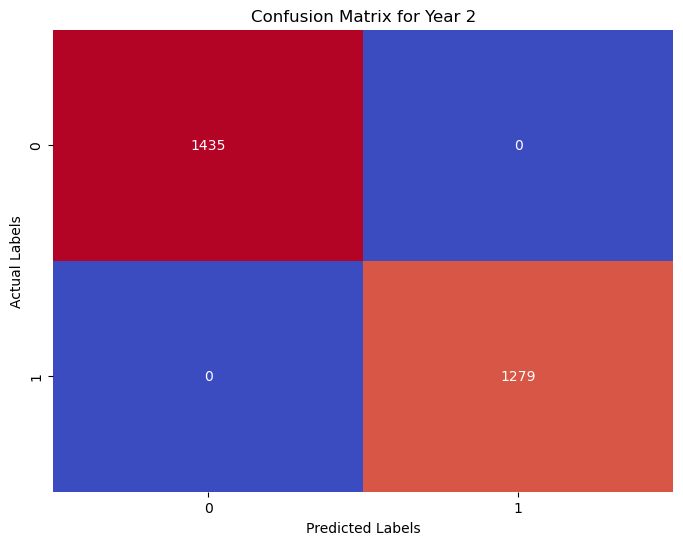

Year: 3
Accuracy: 0.7370659107016301
Recall: 0.5914542728635682
Precision: 0.8002028397565923
F1 Score: 0.6801724137931033



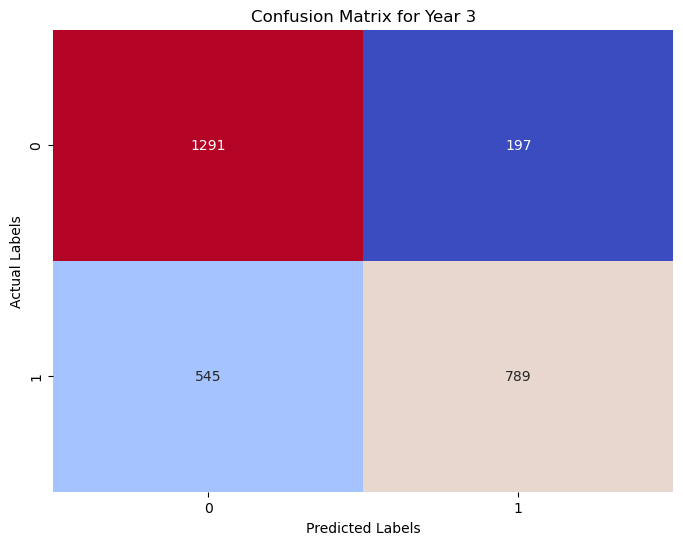

Year: 4
Accuracy: 0.8173791821561338
Recall: 1.0
Precision: 0.7419566644780039
F1 Score: 0.8518658122879759



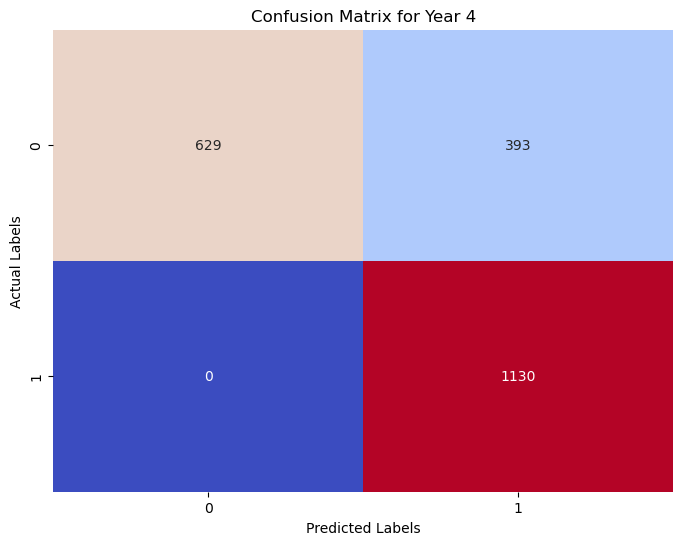

Year: 5
Accuracy: 0.9009174311926605
Recall: 0.952191235059761
Precision: 0.8845299777942265
F1 Score: 0.9171143514965464



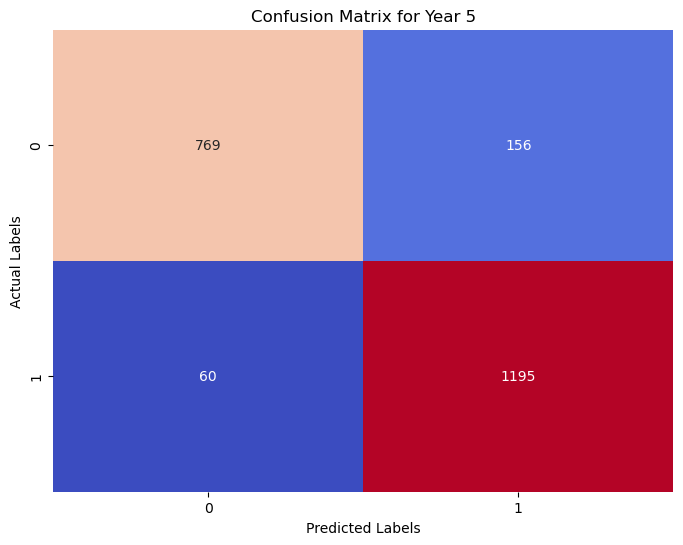

Year: 6
Accuracy: 0.85359477124183
Recall: 1.0
Precision: 0.800118976799524
F1 Score: 0.8889623265036352



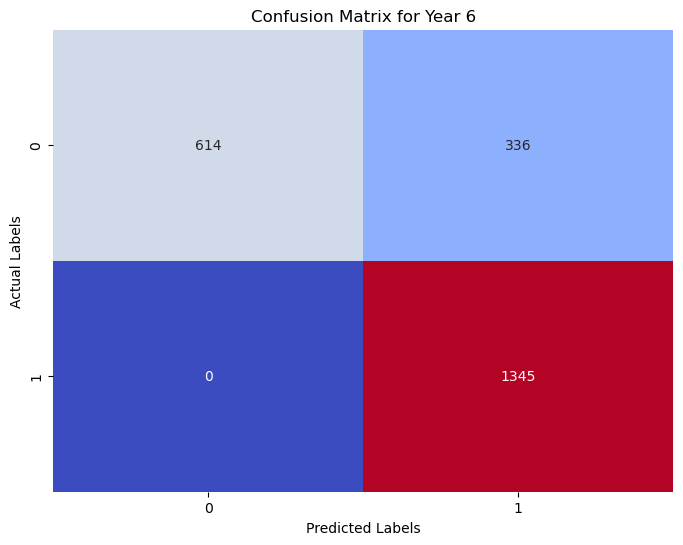

Year: 7
Accuracy: 0.8348017621145375
Recall: 1.0
Precision: 0.7817229336437719
F1 Score: 0.8774910160078406



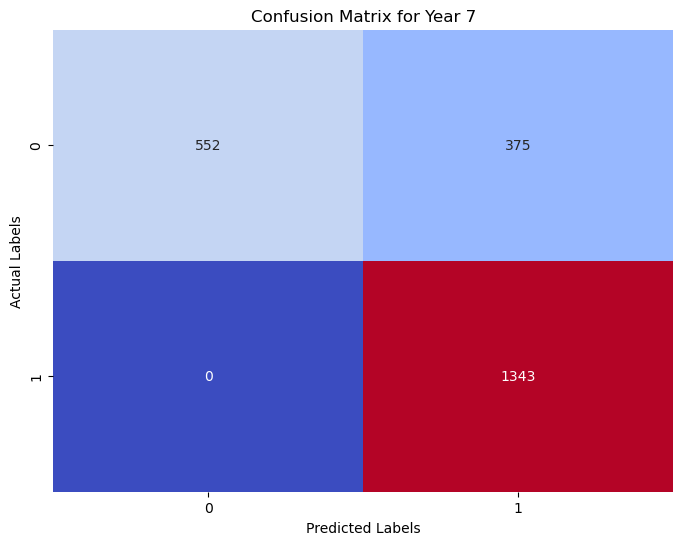

Year: 8
Accuracy: 0.7405764966740577
Recall: 1.0
Precision: 0.6941975953998955
F1 Score: 0.8195001542733724



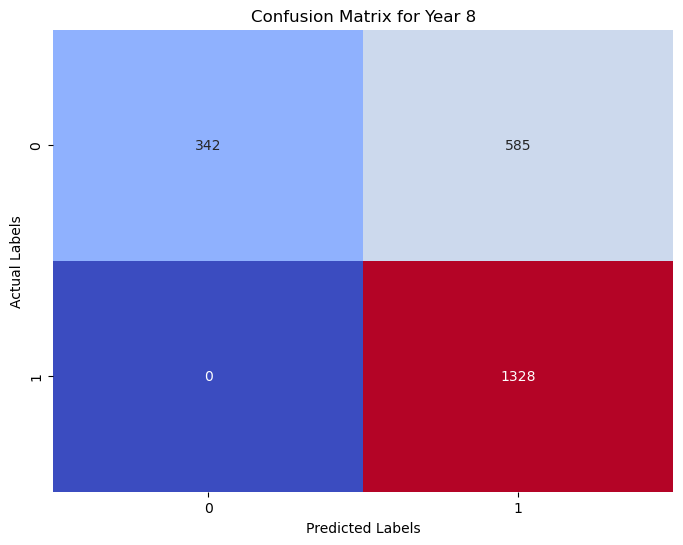

Year: 9
Accuracy: 0.7118167202572347
Recall: 0.7931726907630522
Precision: 0.743879472693032
F1 Score: 0.7677356656948493



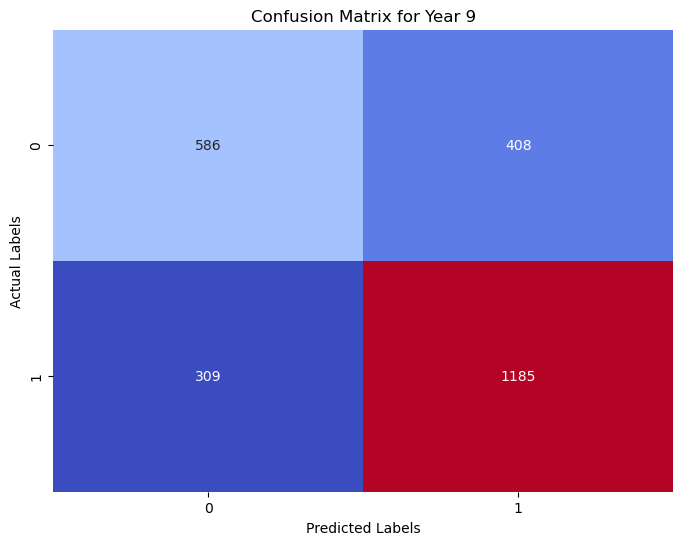

Year: 10
Accuracy: 0.8262322472848789
Recall: 1.0
Precision: 0.788295165394402
F1 Score: 0.881616391576551



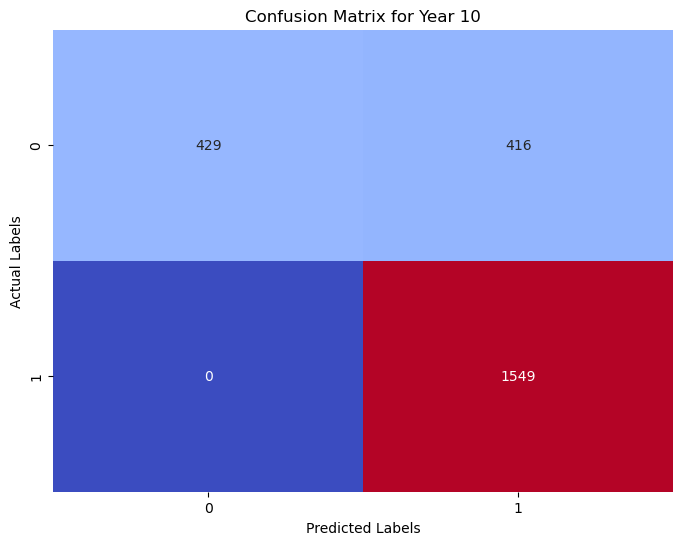


KeyboardInterrupt



In [135]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encode categorical features
categorical_columns = shifted_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_cat = encoder.fit_transform(shifted_df[categorical_columns])
encoded_cat_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and join the encoded ones
shifted_df = shifted_df.drop(columns=categorical_columns).reset_index(drop=True)
shifted_df = pd.concat([shifted_df, encoded_cat_df], axis=1)

# Ensure selected_columns includes only relevant features
selected_columns = [col for col in shifted_df.columns if col not in ['tmID', 'year', 'playoff', 'playoff_next']]

# Step 2: Create train and test sets for each year and make predictions
all_predictions = []

for year in range(1, shifted_df['year'].max() + 1):
    train_df = shifted_df[shifted_df['year'] <= year]
    test_df = shifted_df[shifted_df['year'] == year]
    
    X_train = train_df[selected_columns]
    y_train = train_df['playoff_next']
    X_test = test_df[selected_columns]
    y_test = test_df['playoff_next']
    
    # Drop rows with NaN values in target variable
    nan_indices_train = y_train.index[y_train.isnull()]
    nan_indices_test = y_test.index[y_test.isnull()]
    X_train = X_train.drop(index=nan_indices_train)
    y_train = y_train.drop(index=nan_indices_train)
    X_test = X_test.drop(index=nan_indices_test)
    y_test = y_test.drop(index=nan_indices_test)
    
    # Ensure at least 2 splits and not more splits than samples
    num_splits = max(2, min(5, len(train_df)))
    
    if len(train_df) < 1:
        print(f"Skipping year {year} due to insufficient training data.")
        continue
    
    # Initialize TimeSeriesSplit with adjusted number of splits
    tscv = TimeSeriesSplit(n_splits=num_splits)
    
    # Define the Ridge Classifier and perform hyperparameter tuning
    rr = RidgeClassifier()
    param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(rr, param_grid, cv=tscv, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_rr = grid_search.best_estimator_
    
    # Initialize Sequential Feature Selector
    sfs = SequentialFeatureSelector(best_rr, n_features_to_select=min(30, len(selected_columns)), direction='forward', cv=tscv)
    sfs.fit(X_train, y_train)
    
    selected_feature_indices = sfs.get_support()
    selected_features = X_train.columns[selected_feature_indices]
    
    best_rr.fit(X_train[selected_features], y_train)
    
    # Make predictions for the current year
    predictions = best_rr.predict(X_test[selected_features])
    all_predictions.append((year, predictions, y_test))
    
    # Evaluate model performance
    try:
        if not y_test.isnull().any():  # Check for NaN values in y_test
            conf_matrix = confusion_matrix(y_test, predictions)
            accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / conf_matrix.sum()
            recall = recall_score(y_test, predictions)
            precision = precision_score(y_test, predictions)
            f1 = f1_score(y_test, predictions)
            
            print(f"Year: {year}")
            print(f"Accuracy: {accuracy}")
            print(f"Recall: {recall}")
            print(f"Precision: {precision}")
            print(f"F1 Score: {f1}")
            print()

            # Optional: Plot confusion matrix
            plt.figure(figsize=(8, 6))
            cmap = sns.color_palette("coolwarm", as_cmap=True)
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap, cbar=False)
            plt.xlabel('Predicted Labels')
            plt.ylabel('Actual Labels')
            plt.title(f'Confusion Matrix for Year {year}')
            plt.show()
        else:
            print(f"Skipping evaluation for year {year} due to NaN values in y_test.")
    
    except Exception as e:
        print(f"Error occurred during evaluation for year {year}: {e}")